In [1]:
import pandas as pd
import os

In [2]:
# Load the data
data_folder = os.path.join("..", "..", "data", "interim")
df = pd.read_csv(os.path.join(data_folder, 'all_test_combined.csv'), low_memory=False, index_col=0, parse_dates=True)
df.index = pd.to_datetime(df.index)
df.head()

,p_num,time,bg,insulin,carbs,hr,steps,cals,activity
2000-01-02 00:50:00,p01,00:50:00,9.20,0.0083,NaN,59.7,0.0,5.30,NaN
2000-01-02 00:55:00,p01,00:55:00,9.20,0.0083,NaN,55.6,NaN,5.30,NaN
2000-01-02 01:00:00,p01,01:00:00,9.53,0.0083,NaN,58.2,0.0,5.00,NaN
2000-01-02 01:05:00,p01,01:05:00,9.87,0.0083,NaN,59.3,0.0,5.20,NaN
2000-01-02 01:10:00,p01,01:10:00,10.20,0.0083,NaN,58.0,0.0,6.25,NaN


In [3]:
# patient p_24
df_p24 = df[df['p_num'] == 'p24']
df_p24.head()

,p_num,time,bg,insulin,carbs,hr,steps,cals,activity
2014-01-02 10:40:00,p24,10:40:00,8.7,0.0708,NaN,79.1,0.0,4.39,NaN
2014-01-02 10:45:00,p24,10:45:00,8.2,0.0708,NaN,84.1,225.0,15.94,NaN
2014-01-02 10:50:00,p24,10:50:00,8.3,0.0708,NaN,104.3,41.0,12.11,NaN
2014-01-02 10:55:00,p24,10:55:00,8.8,0.0708,NaN,85.0,53.0,6.97,NaN
2014-01-02 11:00:00,p24,11:00:00,8.9,0.0708,NaN,92.2,145.0,13.20,NaN


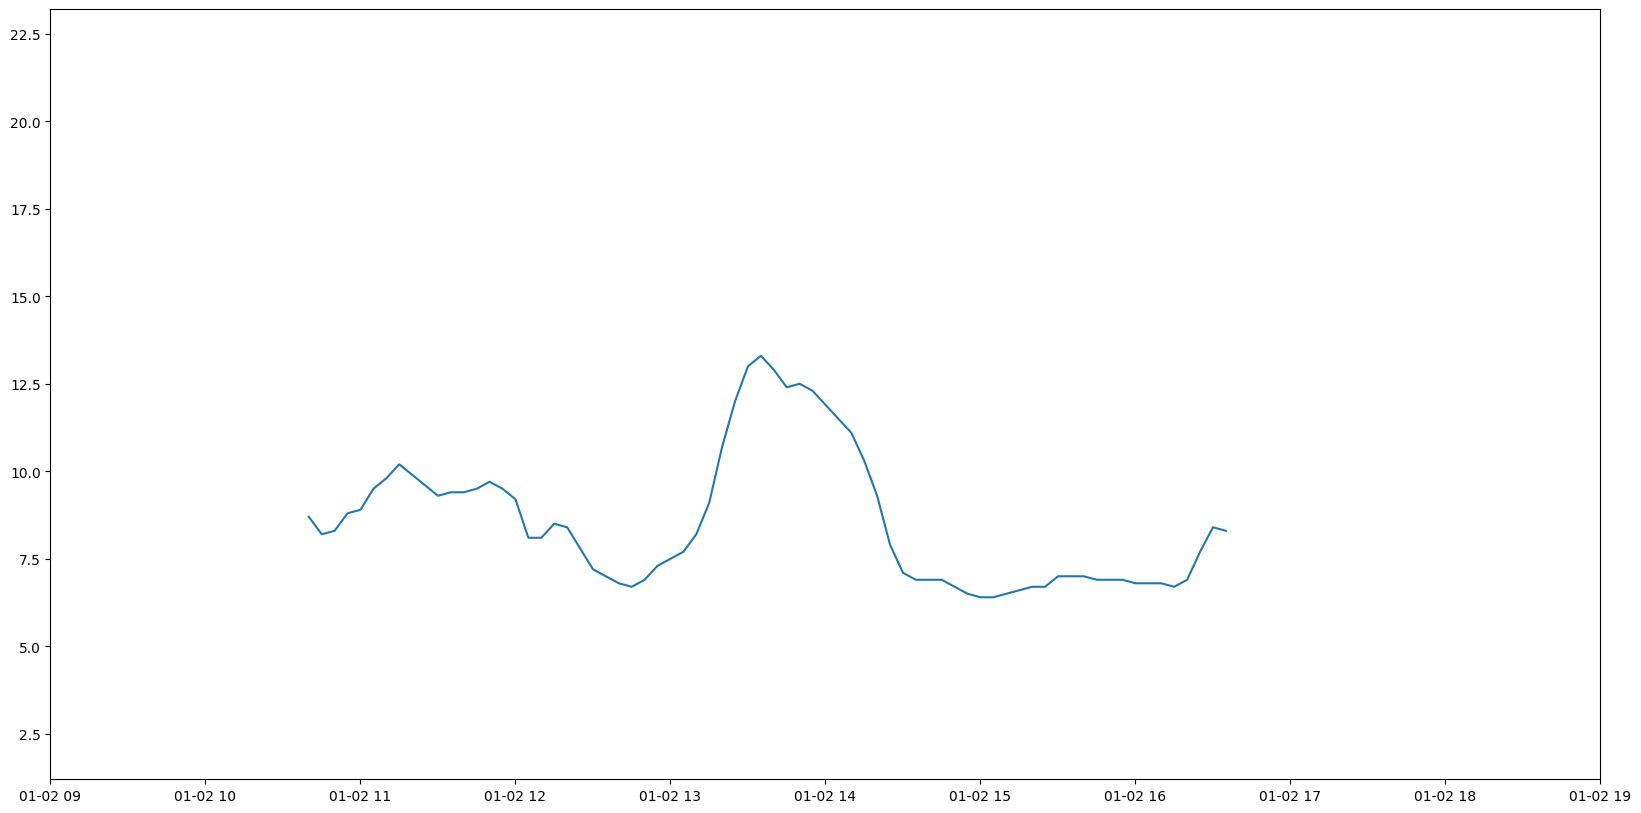

In [10]:
from datetime import datetime
# plot the data for bg for patient 1 for the first 2 hours
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df_p24['bg'])
plt.xlim([datetime(2014, 1, 2, 9, 0, 0), datetime(2014, 1, 2, 19, 0, 0)])
plt.show()

In [3]:
# check if it's correct

raw_data_folder = os.path.join("..", "..", "data", "raw")
test_data = pd.read_csv(os.path.join(raw_data_folder, 'test.csv'), low_memory=False, index_col=0)
test_data


,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p24_256,p24,06:40:00,7.3,7.3,7.1,6.7,6.8,6.8,6.9,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p24_257,p24,12:30:00,6.0,6.2,6.2,6.2,5.8,5.5,5.7,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p24_258,p24,03:45:00,12.4,12.5,12.7,13.1,13.2,13.3,13.0,12.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
result_df_2h = pd.read_csv(os.path.join(data_folder, 'all_test_2h.csv'), low_memory=False)
result_df_2h

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01,02:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.57
1,p01,02:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.40
2,p01,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.57
3,p01,03:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.73
4,p01,03:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133704,p24,01:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.40
133705,p24,01:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.40
133706,p24,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.40
133707,p24,02:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.50
